# Análise Exploratória

In [1]:
# importar biblioteca pandas
import pandas as pd

# carregar dados do google drive para um dataframe pandas
dados = pd.read_csv('https://drive.google.com/uc?export=download&id=16svUBw4-OiMHoiwHRz27GqYAKB00fId8')

In [2]:
# visualizar amostra dos dados
dados.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# visualizar estrutura dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# exibir estatísticas dos dados numéricos
dados.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

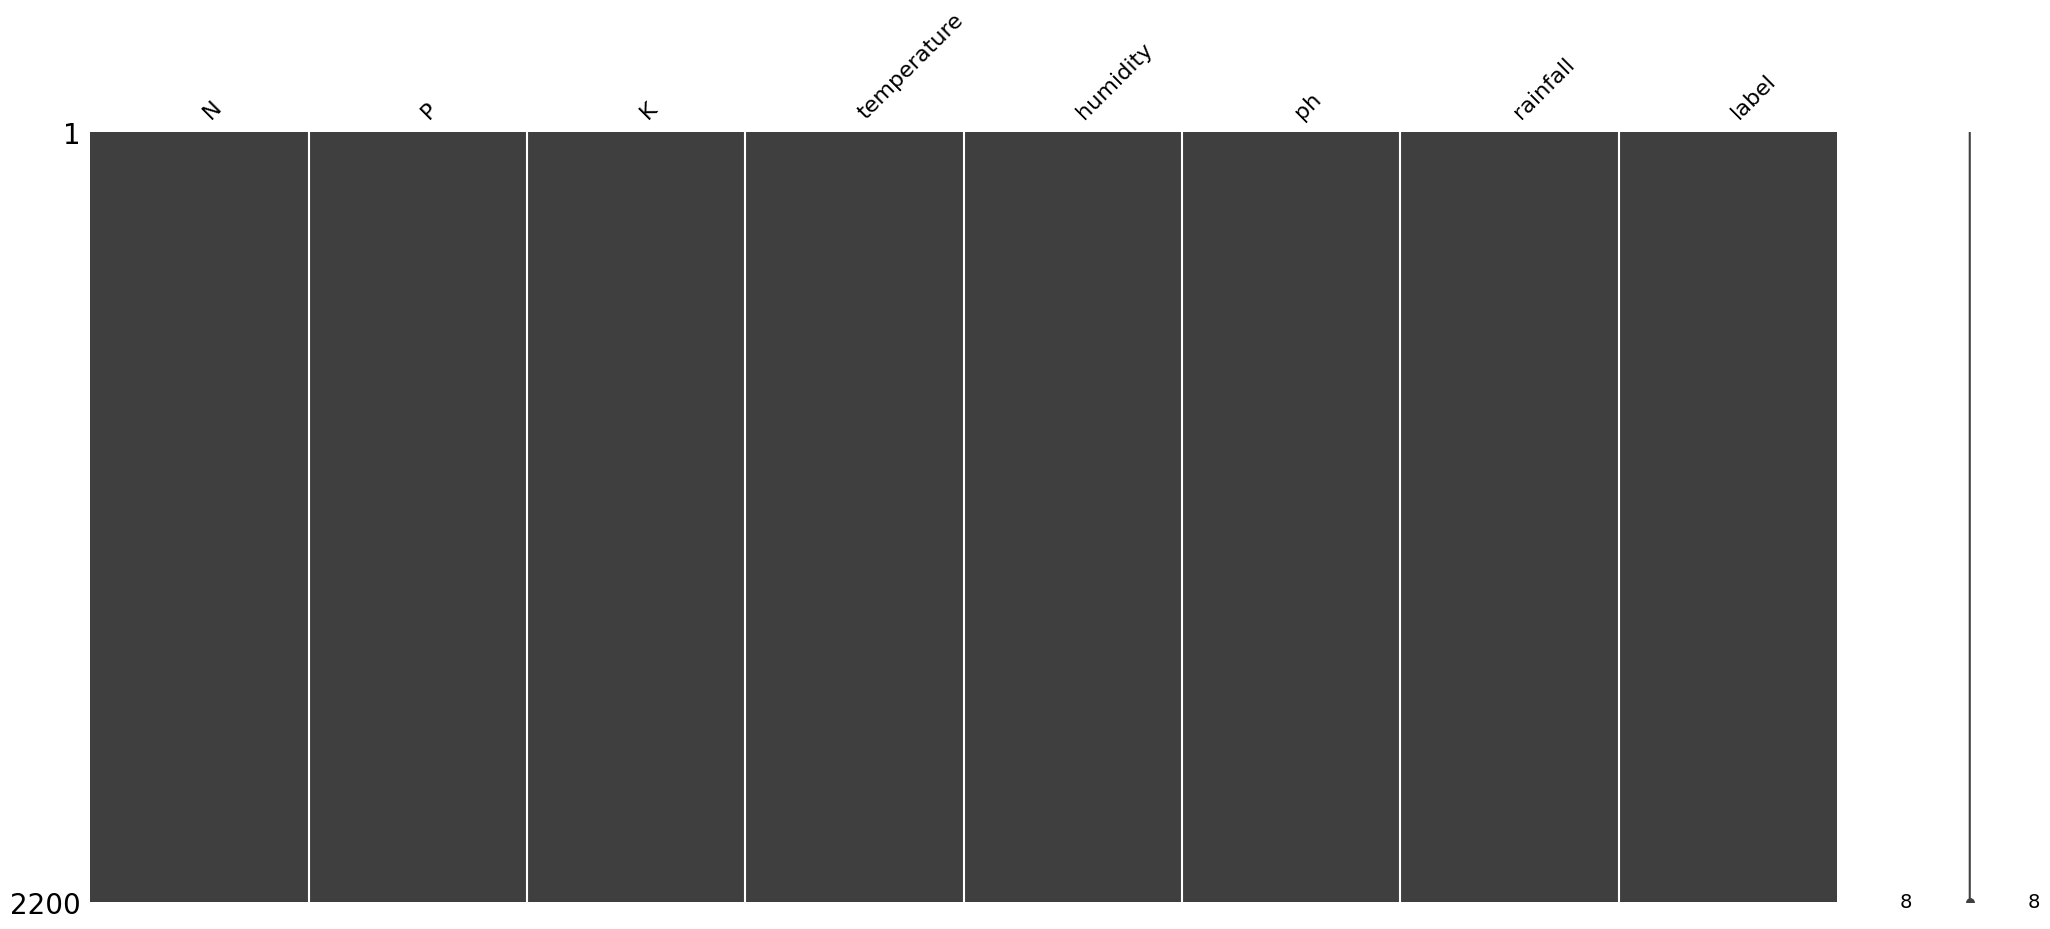

In [5]:
# verificar se há valores vazios
import missingno as msno
msno.matrix(dados)

In [6]:
# deletar linhas com dados vazios
dados.dropna(inplace=True)

In [7]:
# checar se há duplicidade
dados[dados.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [8]:
# remover duplicidades
dados.drop_duplicates(inplace=True)

# Análise Descritiva

In [9]:
# importar pacote matplotlib
import matplotlib.pyplot as plt

1. Distribuição dos Níveis de Nutrientes (N, P e K)

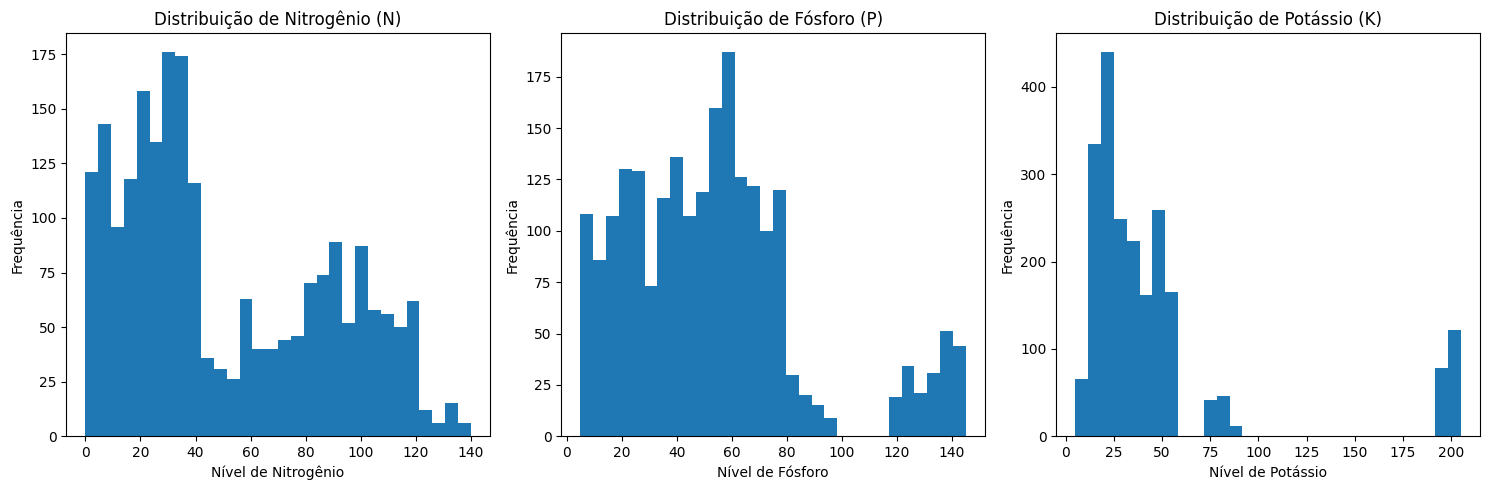

In [10]:
# definir tamanho da imagem
plt.figure(figsize=(15, 5))

# montar gráfico do nitrogênio
plt.subplot(1, 3, 1)
plt.hist(dados['N'], bins=30)
plt.title('Distribuição de Nitrogênio (N)')
plt.xlabel('Nível de Nitrogênio')
plt.ylabel('Frequência')

# montar gráfico do fósforo
plt.subplot(1, 3, 2)
plt.hist(dados['P'], bins=30)
plt.title('Distribuição de Fósforo (P)')
plt.xlabel('Nível de Fósforo')
plt.ylabel('Frequência')

# montar gráfico do potássio
plt.subplot(1, 3, 3)
plt.hist(dados['K'], bins=30)
plt.title('Distribuição de Potássio (K)')
plt.xlabel('Nível de Potássio')
plt.ylabel('Frequência')

# mostrar gráficos juntos
plt.tight_layout()
plt.show()

*A distribuição dos nutrientes indica grande variabilidade. O nitrogênio (N) apresenta uma concentração mais elevada em relação aos outros, enquanto o fósforo (P) e o potássio (K) possuem uma amplitude considerável, com alguns valores extremos, sugerindo diferentes necessidades de nutrientes conforme a cultura.*

2. Distribuição de Temperatura

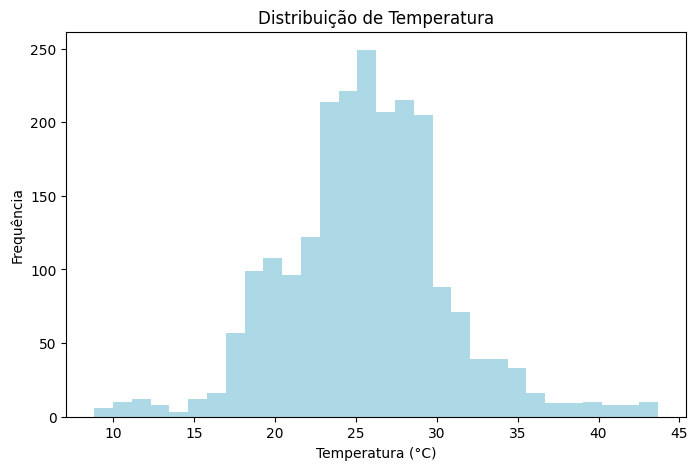

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(dados['temperature'], bins=30, color='lightblue')
plt.title('Distribuição de Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

*A temperatura varia entre aproximadamente 8,8°C e 43,7°C, com a maioria das observações concentradas entre 20°C e 30°C. Esse intervalo é favorável para diversas culturas, mas as temperaturas mais altas podem indicar um ambiente de clima tropical.*

3. Distribuição de Umidade

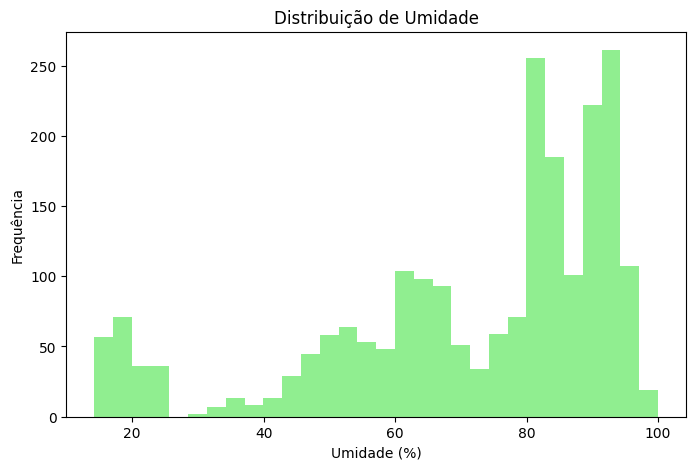

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(dados['humidity'], bins=30, color='lightgreen')
plt.title('Distribuição de Umidade')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')
plt.show()

*A umidade mostra uma ampla faixa de variação, com a maioria dos dados entre 60% e 90%. Esse nível sugere ambientes úmidos, essenciais para o desenvolvimento saudável de culturas tropicais.*

4. Distribuição de pH do Solo

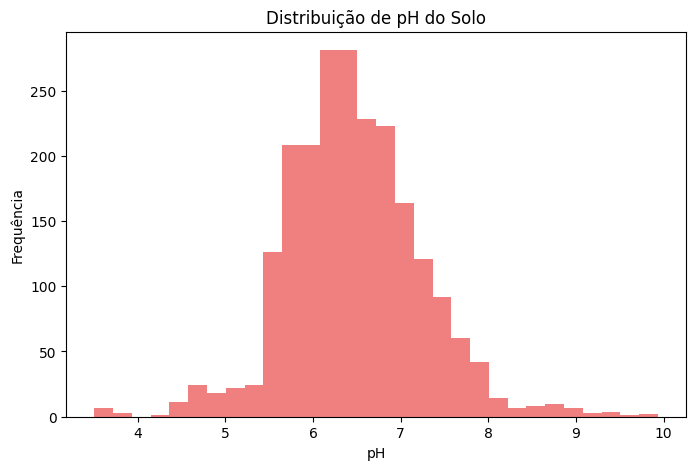

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(dados['ph'], bins=30, color='lightcoral')
plt.title('Distribuição de pH do Solo')
plt.xlabel('pH')
plt.ylabel('Frequência')
plt.show()

*O pH do solo varia de aproximadamente 3,5 a 9,9, com uma concentração maior entre 5,5 e 7,5. Esse intervalo é adequado para a maioria das culturas, mas valores fora dessa faixa podem indicar solos muito ácidos ou alcalinos, restringindo algumas culturas.*

5. Precipitação Média por Cultura

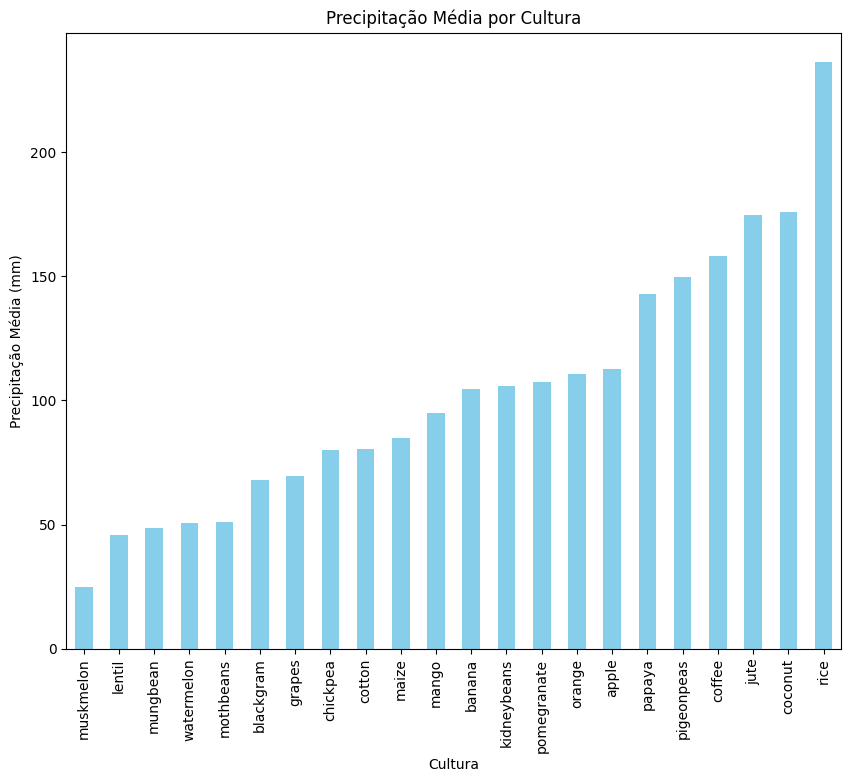

In [15]:
mean_rainfall_per_crop = dados.groupby('label')['rainfall'].mean().sort_values()
plt.figure(figsize=(10, 8))
mean_rainfall_per_crop.plot(kind='bar', color='skyblue')
plt.title('Precipitação Média por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Precipitação Média (mm)')
plt.xticks(rotation=90)
plt.show()

*Cada cultura possui uma necessidade distinta de precipitação. Culturas como o arroz exigem alta precipitação média, enquanto culturas como uvas e jute demandam menos. Essas diferenças refletem as preferências de cada tipo de cultura em termos de irrigação e podem orientar práticas agrícolas para maximizar a produtividade.*

# Encontrar o “perfil ideal” de solo/clima para as plantações

In [18]:
# Calcular o perfil ideal
ideal_profile = dados[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean()

# Selecionar as culturas: arroz, maçã e café
selected_crops = dados[dados['label'].isin(['rice', 'apple', 'coffee'])]
crop_means = selected_crops.groupby('label').mean()

# Exibir o perfil ideal e os valores médios das culturas selecionadas
print("Perfil Ideal de Solo e Clima para as Culturas:")
print(ideal_profile)
print("\nComparação com as Culturas Selecionadas (Arroz, Maçã e Café):")
print(crop_means)

Perfil Ideal de Solo e Clima para as Culturas:
N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

Comparação com as Culturas Selecionadas (Arroz, Maçã e Café):
             N       P       K  temperature   humidity        ph    rainfall
label                                                                       
apple    20.80  134.22  199.89    22.630942  92.333383  5.929663  112.654779
coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308  158.066295
rice     79.89   47.58   39.87    23.689332  82.272822  6.425471  236.181114


# Comparar o perfil ideal com 3 culturas escolhidas (Arroz, Maçã e Café)

<Figure size 1200x800 with 0 Axes>

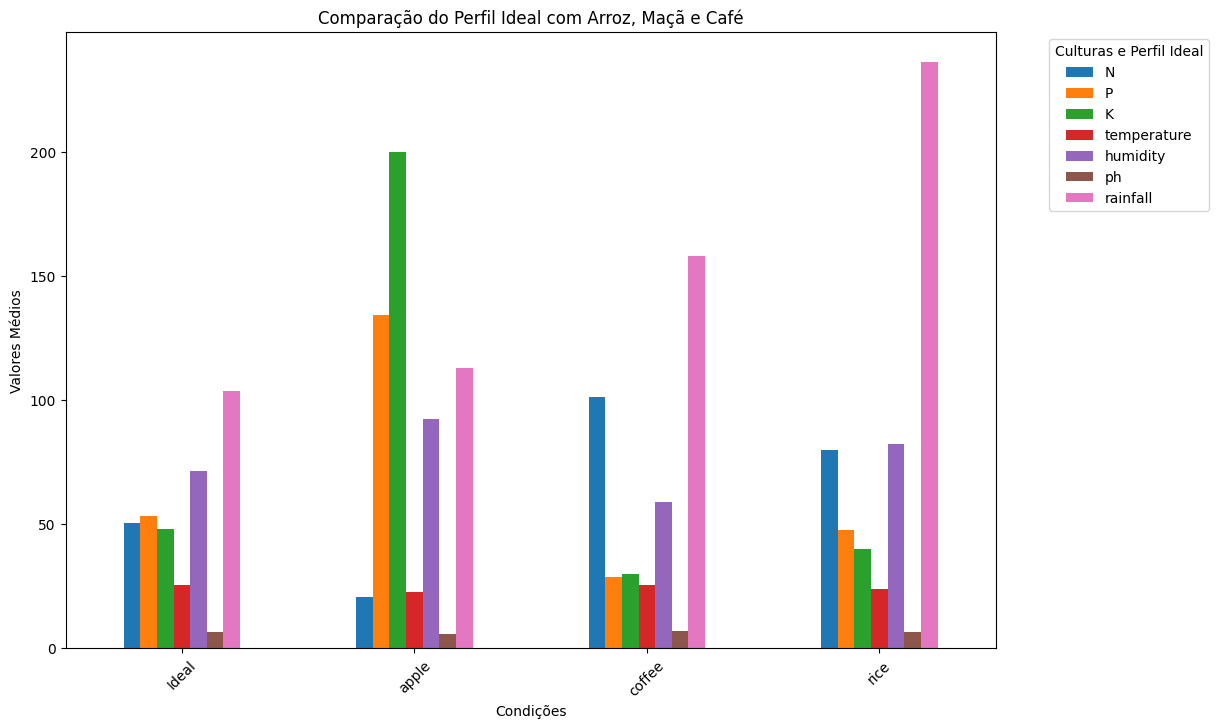

In [21]:
# importar biblioteca matplotlib
import matplotlib.pyplot as plt

# preparar os dados
perfil_ideal = pd.DataFrame(ideal_profile, columns=['Ideal']).T
medias = crop_means[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
comparacao = pd.concat([perfil_ideal, medias])

# Plotting
plt.figure(figsize=(12, 8))
comparacao.plot(kind='bar', figsize=(12, 8), rot=45)
plt.title("Comparação do Perfil Ideal com Arroz, Maçã e Café")
plt.xlabel("Condições")
plt.ylabel("Valores Médios")
plt.legend(title="Culturas e Perfil Ideal", bbox_to_anchor=(1.05, 1))
plt.show()

Observações:
*   Arroz se destaca pela alta necessidade de precipitação, enquanto os níveis de nutrientes estão próximos ao ideal.
*   Maçã apresenta uma exigência significativamente alta de fósforo e potássio, além de alta umidade.
*   Café possui uma demanda elevada por nitrogênio, mas prefere níveis mais baixos de umidade, mantendo temperatura e pH próximos ao ideal.

# Desenvolver 5 Modelos Preditivos

In [25]:
# importar pacotes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# preparar os dados
x = dados[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = dados['label']

# dividir os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# dimensionar os valores das características
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# incializar os modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# treinar e avaliar cada modelo
resultados = {}
for nome_modelo, modelo in models.items():
    # treinar o modelo
    modelo.fit(x_train, y_train)

    # fazer a predição
    y_pred = modelo.predict(x_test)

    # calcular métricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, average='weighted')
    sensibilidade = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # guardar resultados
    resultados[nome_modelo] = {
        'Acurácia': acuracia,
        'Precisão': precisao,
        'Sensibilidade': sensibilidade,
        'F1 Score': f1
    }

# converter resultados para dataframe
resultados_df = pd.DataFrame(resultados).T

# mostrar resultados
print("Resultados da Comparação:")
print(resultados_df)

Resultados da Comparação:
                     Acurácia  Precisão  Sensibilidade  F1 Score
KNN                  0.960606  0.965066       0.960606  0.960199
Logistic Regression  0.959091  0.960432       0.959091  0.958853
Decision Tree        0.983333  0.983614       0.983333  0.983207
Random Forest        0.990909  0.991946       0.990909  0.990803
SVM                  0.972727  0.976838       0.972727  0.972275


Os resultados dos cinco modelos preditivos foram avaliados e exibidos com métricas como acurácia, precisão, sensibilidade e F1-score. Abaixo, seguem as observações iniciais sobre o desempenho:
*   Random Forest apresentou a melhor acurácia e F1-score, indicando um bom ajuste ao problema de classificação das culturas agrícolas.
*   Decision Tree também teve um desempenho excelente, ligeiramente inferior ao Random Forest, mas ainda muito robusto.
*   KNN e SVM obtiveram um desempenho próximo, com acurácia elevada, mas abaixo dos modelos baseados em árvores.
*   Logistic Regression apresentou bons resultados, sendo adequado, mas levemente inferior aos outros modelos para esse caso.



---

